<a href="https://colab.research.google.com/github/AdityaKumbhar21/Covid-19-Detection-using-CT-scan-images/blob/main/Jyoti_of_Covid_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Covid-19 Detection using Convolutional Neural Network VGG16 Model.**

**Importing necessary libraries**

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import he_normal
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Activation,Dense, Flatten, Dropout, concatenate
from sklearn.utils import shuffle

from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Function for loading images and preprocessing it**

In [ ]:
def load_images(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".png"):
            img_path = os.path.join(directory, filename)
            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img)
            img_array = preprocess_input(img_array)
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)

In [ ]:
img_height, img_width = 224, 224
input_shape = (img_height, img_width, 3)

Loading images

In [ ]:
covid_images_path = "/content/drive/MyDrive/data/Covid"
non_covid_images_path = "/content/drive/MyDrive/data/Normal"

covid_images, covid_labels = load_images(covid_images_path, 1)  # 1 for COVID-19
non_covid_images, non_covid_labels = load_images(non_covid_images_path, 0)  # 0 for Normal

Concatenating the data and spliting the data into train test split

In [ ]:
images = np.concatenate((covid_images, non_covid_images), axis=0)
labels = np.concatenate((covid_labels, non_covid_labels), axis=0)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

Loading the VGG 16 model without top layers

In [ ]:
input_tensor = Input(shape = input_shape)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape,input_tensor=input_tensor)

58889256/58889256 [==============================] - 2s 0us/step


Freeze the convolutional model

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

### **VGG16**

In [ ]:
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/5
36/36 [==============================] - 883s 25s/step - loss: 1.2661 - accuracy: 0.5358 - val_loss: 0.6514 - val_accuracy: 0.6098
Epoch 2/5
36/36 [==============================] - 885s 25s/step - loss: 0.6421 - accuracy: 0.6213 - val_loss: 0.4988 - val_accuracy: 0.8502
Epoch 3/5
36/36 [==============================] - 886s 25s/step - loss: 0.5380 - accuracy: 0.7024 - val_loss: 0.3730 - val_accuracy: 0.8537
Epoch 4/5
36/36 [==============================] - 882s 25s/step - loss: 0.4474 - accuracy: 0.7784 - val_loss: 0.2846 - val_accuracy: 0.8955
Epoch 5/5
36/36 [==============================] - 878s 25s/step - loss: 0.3790 - accuracy: 0.8325 - val_loss: 0.2042 - val_accuracy: 0.9268
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (C

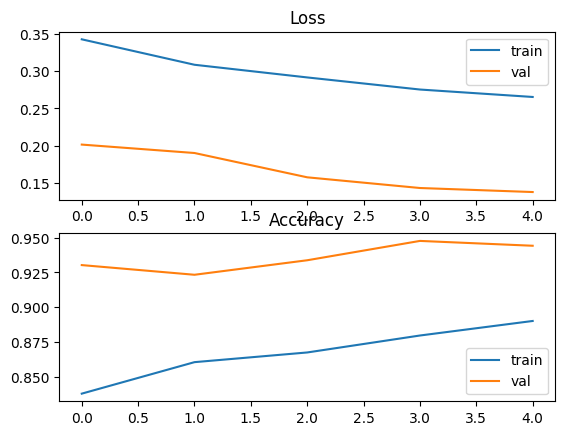

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
model.summary()
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5,batch_size=120,callbacks=[early_stopping])
y_preds = model.predict(X_test)
loss, accuracy = model.evaluate(X_test, y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()

9/9 [==============================] - 176s 20s/step
Accuracy 0.9442508710801394
Precision: 0.9447672180953062
Recall: 0.9442508710801394
F1-score: 0.944324620540249
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       159
           1       0.92      0.95      0.94       128

    accuracy                           0.94       287
   macro avg       0.94      0.95      0.94       287
weighted avg       0.94      0.94      0.94       287



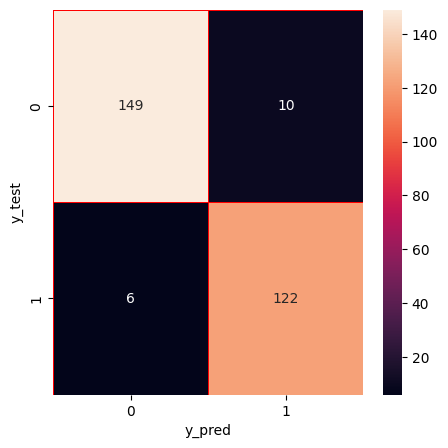

In [ ]:
y_preds = model.predict(X_test)
y_preds = tf.math.round(y_preds)
precision,recall,fscore,none= precision_recall_fscore_support(y_test,y_preds,average='weighted')
accuracy = accuracy_score(y_test, y_preds)
print('Accuracy',accuracy)
print('Precision: '+(str(precision)))
print('Recall: '+(str(recall)))
print('F1-score: '+(str(fscore)))
print(classification_report(y_test,y_preds))
cm=confusion_matrix(y_test,y_preds)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

Evaluating the results

In [ ]:
def predict_report(path):
  test_image_path = path
  img = image.load_img(test_image_path, target_size=(224, 224))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array = preprocess_input(img_array)

  predictions = model.predict(img_array)

  if predictions[0][0] > 0.5:
      print("Prediction: COVID-19")
  else:
      print("Prediction: Normal")

In [ ]:
predict_report("/content/drive/MyDrive/data/Covid/Covid (1).png")

1/1 [==============================] - 1s 957ms/step
Prediction: COVID-19


In [ ]:
predict_report("/content/drive/MyDrive/data/Normal/Non-Covid (1).png")

1/1 [==============================] - 1s 822ms/step
Prediction: Normal


### **INCEPTIONV3**

In [ ]:
base_model1 = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape,input_tensor=input_tensor)
x1 = base_model1.output
x1 = tf.keras.layers.GlobalAveragePooling2D()(x1)
x1 = tf.keras.layers.Dense(64, activation='relu')(x1)
x1 = tf.keras.layers.Dropout(0.5)(x1)
x1 = tf.keras.layers.Dense(128, activation='relu')(x1)
x1 = tf.keras.layers.Dropout(0.5)(x1)
x1 = tf.keras.layers.Dense(256, activation='relu')(x1)
x1 = tf.keras.layers.Dropout(0.5)(x1)
x1 = tf.keras.layers.Dense(128, activation='relu')(x1)
x1 = tf.keras.layers.Dropout(0.5)(x1)
x1 = tf.keras.layers.Dense(64, activation='relu')(x1)
x1 = tf.keras.layers.Dropout(0.5)(x1)
x1 = tf.keras.layers.Dense(32, activation='relu')(x1)
x1 = tf.keras.layers.Dropout(0.5)(x1)


predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x1)

model1 = Model(inputs=base_model1.input, outputs=predictions)
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

NameError: name 'InceptionV3' is not defined

In [ ]:
history = model1.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model1.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
model1.summary()
history=model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5,batch_size=120,callbacks=[early_stopping])
y_preds = model1.predict(X_test)
loss, accuracy = model1.evaluate(X_test, y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()

In [ ]:
def load_images(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".png"):
            img_path = os.path.join(directory, filename)
            img = image.load_img(img_path, target_size=(224, 224))  # Resize to (224, 224)
            img_array = image.img_to_array(img)
            img_array = preprocess_input(img_array)
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)


base_model1 = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))


In [ ]:
y_preds = model1.predict(X_test)
y_preds = tf.math.round(y_preds)
precision,recall,fscore,none= precision_recall_fscore_support(y_test,y_preds,average='weighted')
accuracy = accuracy_score(y_test, y_preds)
print('Accuracy',accuracy)
print('Precision: '+(str(precision)))
print('Recall: '+(str(recall)))
print('F1-score: '+(str(fscore)))
print(classification_report(y_test,y_preds))
cm=confusion_matrix(y_test,y_preds)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

In [ ]:
def predict_report(path):
  test_image_path = path
  img = image.load_img(test_image_path, target_size=(224, 224))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array = preprocess_input(img_array)

  predictions = model1.predict(img_array)

  if predictions[0][0] > 0.5:
      print("Prediction: COVID-19")
  else:
      print("Prediction: Normal")

In [ ]:
predict_report("/content/drive/MyDrive/data/Covid/Covid (1).png")

In [ ]:
predict_report("/content/drive/MyDrive/data/Normal/Non-Covid (1).png")

### **InceptionV3 (Changes)**

Epoch 1/5
4/4 [==============================] - 88s 22s/step - loss: 2.7919 - accuracy: 0.5479 - val_loss: 0.8121 - val_accuracy: 0.4833
Epoch 2/5
4/4 [==============================] - 79s 21s/step - loss: 2.3738 - accuracy: 0.5125 - val_loss: 0.6824 - val_accuracy: 0.4833
Epoch 3/5
4/4 [==============================] - 79s 21s/step - loss: 1.7755 - accuracy: 0.5292 - val_loss: 0.5885 - val_accuracy: 0.6417
Epoch 4/5
4/4 [==============================] - 72s 19s/step - loss: 1.2514 - accuracy: 0.5875 - val_loss: 0.5157 - val_accuracy: 0.8500
Epoch 5/5
4/4 [==============================] - 14s 4s/step - loss: 0.6449 - accuracy: 0.5667
Test Loss: 0.6449, Test Accuracy: 0.5667


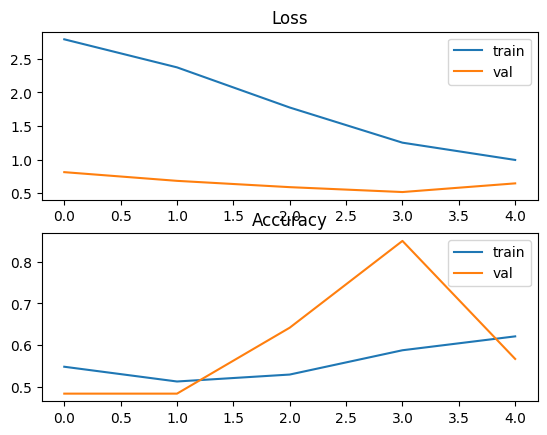

4/4 [==============================] - 16s 3s/step
Precision: 0.6000, Sensitivity (Recall): 0.4839


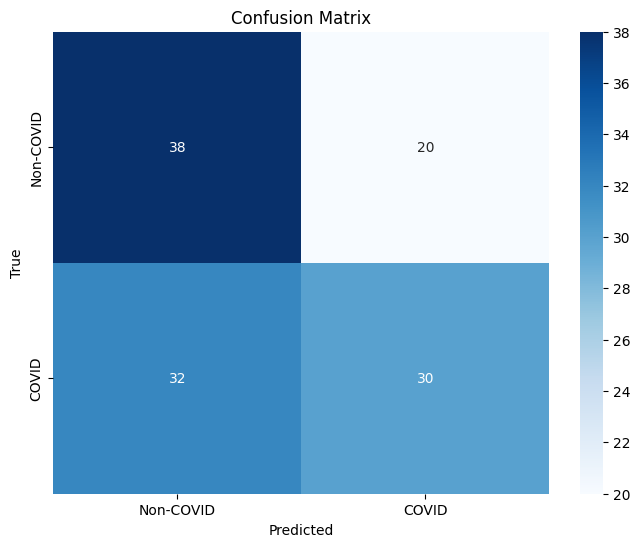

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix, precision_score, recall_score

base_model2 = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model2.layers:
    layer.trainable = False

x1 = base_model2.output
x1 = GlobalAveragePooling2D()(x1)
x1 = Dense(512, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(256, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(128, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(64, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(32, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
predictions = Dense(1, activation='sigmoid')(x1)

model1 = Model(inputs=base_model2.input, outputs=predictions)


optimizer = tf.keras.optimizers.Adam(lr=0.001)
model1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model1.fit(X_train, y_train, epochs=5, batch_size=124, validation_data=(X_test, y_test))


loss, accuracy = model1.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()


y_pred = model1.predict(X_test)
y_pred_binary = np.round(y_pred)

precision = precision_score(y_test, y_pred_binary)
sensitivity = recall_score(y_test, y_pred_binary)

print(f'Precision: {precision:.4f}, Sensitivity (Recall): {sensitivity:.4f}')


conf_matrix = confusion_matrix(y_test, y_pred_binary)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Non-COVID', 'COVID'], yticklabels=['Non-COVID', 'COVID'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### **Inception V3 (6 epochs, 124 batch size)**

Epoch 1/6
4/4 [==============================] - 158s 46s/step - loss: 4.1324 - accuracy: 0.5042 - val_loss: 0.9580 - val_accuracy: 0.5167
Epoch 2/6
4/4 [==============================] - 84s 23s/step - loss: 2.6225 - accuracy: 0.5979 - val_loss: 0.5030 - val_accuracy: 0.7333
Epoch 3/6
4/4 [==============================] - 74s 19s/step - loss: 1.7263 - accuracy: 0.6083 - val_loss: 0.3209 - val_accuracy: 0.9000
Epoch 4/6
4/4 [==============================] - 80s 21s/step - loss: 1.4672 - accuracy: 0.6000 - val_loss: 0.3531 - val_accuracy: 0.8250
Epoch 5/6
4/4 [==============================] - 79s 21s/step - loss: 1.1172 - accuracy: 0.6542 - val_loss: 0.3731 - val_accuracy: 0.8083
Epoch 6/6
4/4 [==============================] - 14s 3s/step - loss: 0.3766 - accuracy: 0.8083
Test Loss: 0.3766, Test Accuracy: 0.8083


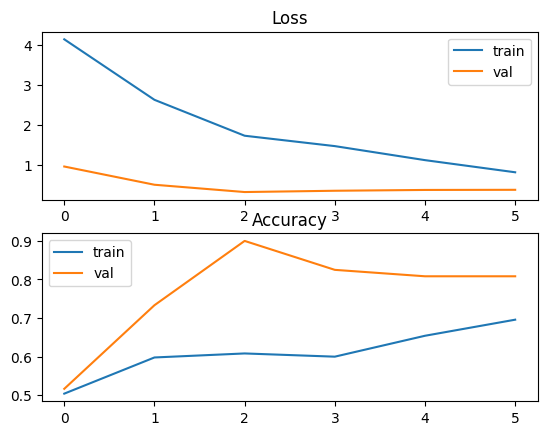

4/4 [==============================] - 15s 3s/step
Precision: 0.7407, Sensitivity (Recall): 0.9677


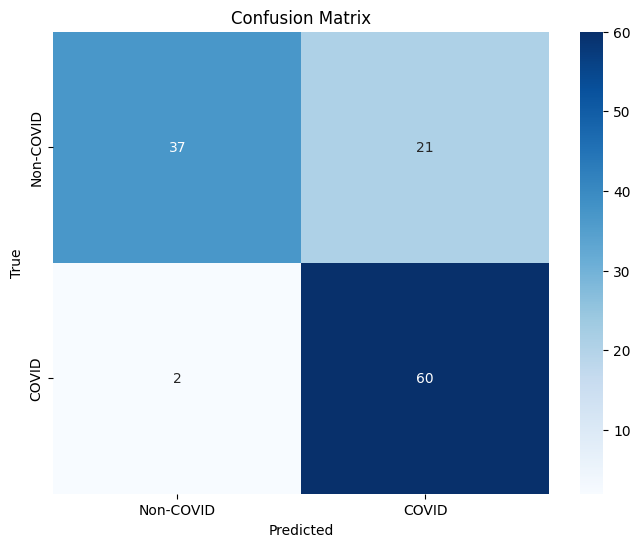

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix, precision_score, recall_score

base_model2 = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model2.layers:
    layer.trainable = False

x1 = base_model2.output
x1 = GlobalAveragePooling2D()(x1)
x1 = Dense(512, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(256, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(128, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(64, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(32, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
predictions = Dense(1, activation='sigmoid')(x1)

model1 = Model(inputs=base_model2.input, outputs=predictions)


optimizer = tf.keras.optimizers.Adam(lr=0.001)
model1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model1.fit(X_train, y_train, epochs = 6,  batch_size=124, validation_data=(X_test, y_test))


loss, accuracy = model1.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()


y_pred = model1.predict(X_test)
y_pred_binary = np.round(y_pred)

precision = precision_score(y_test, y_pred_binary)
sensitivity = recall_score(y_test, y_pred_binary)

print(f'Precision: {precision:.4f}, Sensitivity (Recall): {sensitivity:.4f}')


conf_matrix = confusion_matrix(y_test, y_pred_binary)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Non-COVID', 'COVID'], yticklabels=['Non-COVID', 'COVID'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### **Inception V3(6 epochs, 64 batch size)**

Epoch 1/6
8/8 [==============================] - 80s 9s/step - loss: 2.9443 - accuracy: 0.5583 - val_loss: 0.3976 - val_accuracy: 0.8500
Epoch 2/6
8/8 [==============================] - 72s 9s/step - loss: 2.5692 - accuracy: 0.5188 - val_loss: 0.6414 - val_accuracy: 0.6750
Epoch 3/6
8/8 [==============================] - 71s 9s/step - loss: 1.5590 - accuracy: 0.5479 - val_loss: 0.5831 - val_accuracy: 0.7333
Epoch 4/6
8/8 [==============================] - 76s 10s/step - loss: 1.2534 - accuracy: 0.6042 - val_loss: 0.4383 - val_accuracy: 0.9417
Epoch 5/6
8/8 [==============================] - 71s 9s/step - loss: 0.9797 - accuracy: 0.6208 - val_loss: 0.5102 - val_accuracy: 0.6750
Epoch 6/6
4/4 [==============================] - 15s 3s/step - loss: 0.4481 - accuracy: 0.8583
Test Loss: 0.4481, Test Accuracy: 0.8583


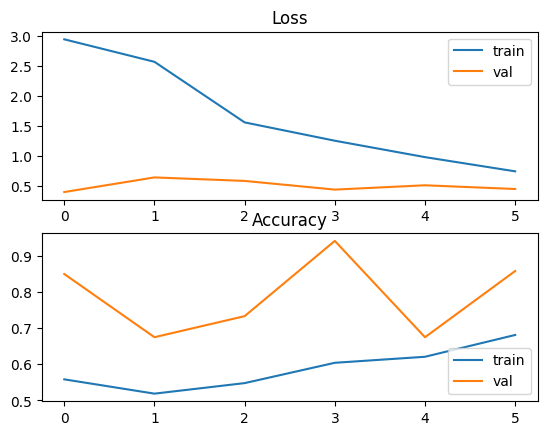

4/4 [==============================] - 23s 4s/step
Precision: 0.8261, Sensitivity (Recall): 0.9194


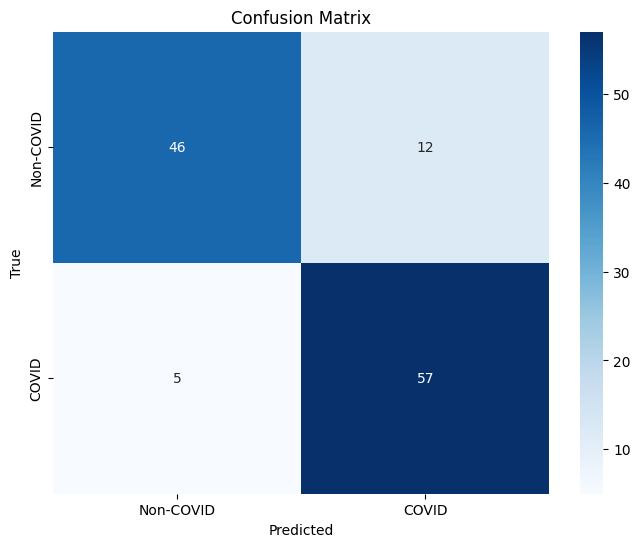

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix, precision_score, recall_score

base_model2 = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model2.layers:
    layer.trainable = False

x1 = base_model2.output
x1 = GlobalAveragePooling2D()(x1)
x1 = Dense(512, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(256, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(128, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(64, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(32, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
predictions = Dense(1, activation='sigmoid')(x1)

model1 = Model(inputs=base_model2.input, outputs=predictions)


optimizer = tf.keras.optimizers.Adam(lr=0.001)
model1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model1.fit(X_train, y_train, epochs = 6,  batch_size=64, validation_data=(X_test, y_test))


loss, accuracy = model1.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()


y_pred = model1.predict(X_test)
y_pred_binary = np.round(y_pred)

precision = precision_score(y_test, y_pred_binary)
sensitivity = recall_score(y_test, y_pred_binary)

print(f'Precision: {precision:.4f}, Sensitivity (Recall): {sensitivity:.4f}')


conf_matrix = confusion_matrix(y_test, y_pred_binary)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Non-COVID', 'COVID'], yticklabels=['Non-COVID', 'COVID'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### **Inception V3(9 epochs, 32 batch size)**

Epoch 1/9
15/15 [==============================] - 87s 5s/step - loss: 3.0462 - accuracy: 0.5146 - val_loss: 0.6424 - val_accuracy: 0.4833
Epoch 2/9
15/15 [==============================] - 71s 5s/step - loss: 1.6244 - accuracy: 0.5792 - val_loss: 0.5308 - val_accuracy: 0.9167
Epoch 3/9
15/15 [==============================] - 76s 5s/step - loss: 1.2334 - accuracy: 0.6000 - val_loss: 0.4700 - val_accuracy: 0.9083
Epoch 4/9
15/15 [==============================] - 77s 5s/step - loss: 1.0231 - accuracy: 0.5813 - val_loss: 0.4250 - val_accuracy: 0.8833
Epoch 5/9
15/15 [==============================] - 77s 5s/step - loss: 0.7730 - accuracy: 0.6354 - val_loss: 0.4055 - val_accuracy: 0.8833
Epoch 6/9
15/15 [==============================] - 77s 5s/step - loss: 0.7279 - accuracy: 0.6521 - val_loss: 0.4078 - val_accuracy: 0.8917
Epoch 7/9
15/15 [==============================] - 69s 5s/step - loss: 0.5847 - accuracy: 0.7104 - val_loss: 0.3761 - val_accuracy: 0.8750
Epoch 8/9
15/15 [==========

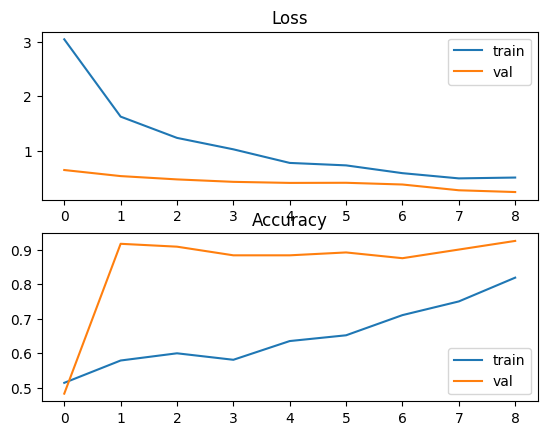

4/4 [==============================] - 19s 3s/step
Precision: 0.9818, Sensitivity (Recall): 0.8710, F1-Score: 0.9231


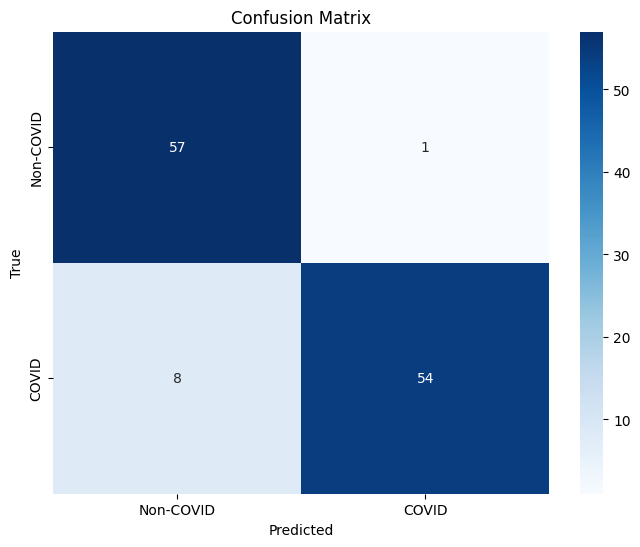

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

base_model2 = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model2.layers:
    layer.trainable = False

x1 = base_model2.output
x1 = GlobalAveragePooling2D()(x1)
x1 = Dense(512, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(256, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(128, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(64, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(32, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
predictions = Dense(1, activation='sigmoid')(x1)

model1 = Model(inputs=base_model2.input, outputs=predictions)


optimizer = tf.keras.optimizers.Adam(lr=0.001)
model1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model1.fit(X_train, y_train, epochs = 9,  batch_size=32, validation_data=(X_test, y_test))


loss, accuracy = model1.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()


y_pred = model1.predict(X_test)
y_pred_binary = np.round(y_pred)

precision = precision_score(y_test, y_pred_binary)
sensitivity = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f'Precision: {precision:.4f}, Sensitivity (Recall): {sensitivity:.4f}, F1-Score: {f1:.4f}')


conf_matrix = confusion_matrix(y_test, y_pred_binary)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Non-COVID', 'COVID'], yticklabels=['Non-COVID', 'COVID'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### **VGG19**

In [ ]:
base_model2 = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x2 = base_model2.output
x2 = tf.keras.layers.GlobalAveragePooling2D()(x2)
x2 = tf.keras.layers.Dense(256, activation='relu')(x2)
x2 = tf.keras.layers.Dropout(0.5)(x2)
predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x2)

model2 = Model(inputs=base_model2.input, outputs=predictions)
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
## history = model2.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model2.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
model2.summary()
history=model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=9,batch_size=32,callbacks=[early_stopping])
y_preds = model2.predict(X_test)
loss, accuracy = model2.evaluate(X_test, y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

KeyboardInterrupt: 

In [ ]:
y_preds = model2.predict(X_test)
y_preds = tf.math.round(y_preds)
precision,recall,fscore,none= precision_recall_fscore_support(y_test,y_preds,average='weighted')
accuracy = accuracy_score(y_test, y_preds)
print('Accuracy',accuracy)
print('Precision: '+(str(precision)))
print('Recall: '+(str(recall)))
print('F1-score: '+(str(fscore)))
print(classification_report(y_test,y_preds))
cm=confusion_matrix(y_test,y_preds)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

In [ ]:
def predict_report(path):
  test_image_path = path
  img = image.load_img(test_image_path, target_size=(224, 224))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array = preprocess_input(img_array)

  predictions = model2.predict(img_array)

  if predictions[0][0] > 0.5:
      print("Prediction: COVID-19")
  else:
      print("Prediction: Normal")

In [ ]:
predict_report("/content/drive/MyDrive/data/Covid/Covid (1).png")

In [ ]:
predict_report("/content/drive/MyDrive/data/Normal/Non-Covid (1).png")

### **Resnet 50**

Epoch 1/9
15/15 [==============================] - 145s 10s/step - loss: 0.5701 - accuracy: 0.7500 - val_loss: 0.1690 - val_accuracy: 0.9333
Epoch 2/9
15/15 [==============================] - 141s 9s/step - loss: 0.1309 - accuracy: 0.9500 - val_loss: 0.0412 - val_accuracy: 1.0000
Epoch 3/9
15/15 [==============================] - 139s 10s/step - loss: 0.0544 - accuracy: 0.9854 - val_loss: 0.0228 - val_accuracy: 1.0000
Epoch 4/9
15/15 [==============================] - 122s 8s/step - loss: 0.0398 - accuracy: 0.9875 - val_loss: 0.0152 - val_accuracy: 1.0000
Epoch 5/9
15/15 [==============================] - 141s 9s/step - loss: 0.0232 - accuracy: 0.9937 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 6/9
15/15 [==============================] - 139s 9s/step - loss: 0.0267 - accuracy: 0.9937 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 7/9
15/15 [==============================] - 140s 10s/step - loss: 0.0151 - accuracy: 0.9979 - val_loss: 0.0121 - val_accuracy: 1.0000
Epoch 8/9
15/15 [

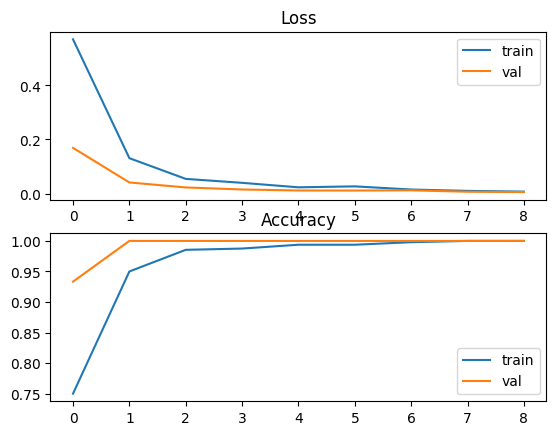

4/4 [==============================] - 29s 7s/step
Precision: 1.0000, Sensitivity (Recall): 1.0000


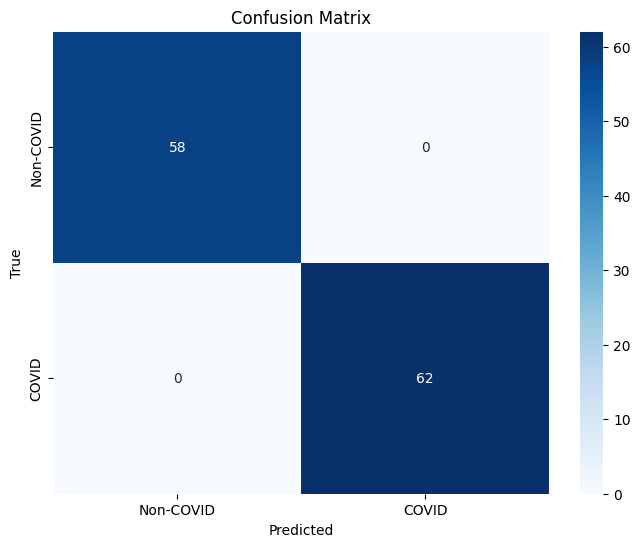

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sns

base_model3 = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze convolutional layers
for layer in base_model3.layers:
    layer.trainable = False

# Add custom top layers for classification
x = base_model3.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model3.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=9, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()


# Calculate precision and sensitivity
y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred)
precision = precision_score(y_test, y_pred_binary)
sensitivity = recall_score(y_test, y_pred_binary)

print(f'Precision: {precision:.4f}, Sensitivity (Recall): {sensitivity:.4f}')


conf_matrix = confusion_matrix(y_test, y_pred_binary)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Non-COVID', 'COVID'], yticklabels=['Non-COVID', 'COVID'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
f1 = f1_score(y_test, y_pred_binary)
print(f'F1 Score: {f1:.4f}')

F1 Score: 1.0000
